In [1]:
%load_ext autoreload
%autoreload 2

from scripts import helper_scripts as sga
from scripts import testing_utils as tu
from scripts.uGLAD import main as uG
from scripts.helper_scripts import process_table, get_partial_correlations, precision_empty, uGLAD_graph
from analytics_utils import get_partial_correlations_from_graph, set_node_attributes

In [2]:
import numpy as np
import pandas as pd

In [4]:
file = "../../../../externalData/Pubmed-Diabetes/data/Pubmed-Diabetes.NODE.paper.tab"

fh = open(file, "r")
index = 0
vocab = {}
data = pd.DataFrame()
while 1:
	line = fh.readline()
	if not line:
		break
	index += 1
	if index < 3:
		continue
	datapoint = {}
	fields = line.split('\t')
	datapoint['paperID'] = int(fields[0])
	datapoint['label'] = int(fields[1][-1])
	for f in fields[2:-1]:
		word, freq = f.split('=')
		datapoint[word] = freq
		vocab[word] = 1
	# data = data.append(datapoint, ignore_index=True)
	# if index % 100 == 0:
	# 	print(index)

In [5]:
print(vocab)

{'w-rat': 1, 'w-common': 1, 'w-use': 1, 'w-examin': 1, 'w-pathogenesi': 1, 'w-retinopathi': 1, 'w-mous': 1, 'w-studi': 1, 'w-anim': 1, 'w-model': 1, 'w-metabol': 1, 'w-abnorm': 1, 'w-contribut': 1, 'w-develop': 1, 'w-investig': 1, 'w-mice': 1, 'w-2': 1, 'w-month': 1, 'w-compar': 1, 'w-obtain': 1, 'w-method': 1, 'w-induc': 1, 'w-6': 1, 'w-inject': 1, 'w-experiment': 1, 'w-normal': 1, 'w-diet': 1, 'w-30': 1, 'w-hyperglycemia': 1, 'w-level': 1, 'w-lipid': 1, 'w-oxid': 1, 'w-activ': 1, 'w-protein': 1, 'w-kinas': 1, 'w-c': 1, 'w-measur': 1, 'w-result': 1, 'w-increas': 1, 'w-retin': 1, 'w-stress': 1, 'w-3': 1, 'w-similar': 1, 'w-observ': 1, 'w-conclus': 1, 'w-play': 1, 'w-import': 1, 'w-role': 1, 'w-present': 1, 'w-p': 1, 'w-m': 1, 'w-r': 1, 'w-muscl': 1, 'w-control': 1, 'w-chang': 1, 'w-dure': 1, 'w-lower': 1, 'w-higher': 1, 'w-mass': 1, 'w-correl': 1, 'w-decreas': 1, 'w-determin': 1, 'w-concentr': 1, 'w-stimul': 1, 'w-period': 1, 'w-caus': 1, 'w-mark': 1, 'w-group': 1, 'w-evid': 1, 'w-fast

In [6]:
file = "../../../../externalData/Pubmed-Diabetes/data/Pubmed-Diabetes.NODE.paper.tab"

fh = open(file, "r")
index = 0
column_list = list(vocab.keys())
column_list.append("paperID")
column_list.append("label")
# print (column_list)
data = pd.DataFrame(columns = column_list)
while 1:
	line = fh.readline()
	if not line:
		break
	index += 1
	if index < 3:
		continue
	datapoint = {}
	fields = line.split('\t')
	datapoint['paperID'] = int(fields[0])
	datapoint['label'] = int(fields[1][-1])
	for f in fields[2:-1]:
		word, freq = f.split('=')
		datapoint[word] = freq
	for v in vocab:
		if v not in datapoint:
			datapoint[v] = 0.0
	data = data.append(datapoint, ignore_index=True)
	if index % 100 == 0:
		print(index)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


KeyboardInterrupt: 

In [ ]:
data.shape

In [ ]:
data.to_csv("../../../../externalData/Pubmed-Diabetes/data/Pubmed-Diabetes.csv", index=None)

In [6]:
data = pd.read_csv("../../../../externalData/Pubmed-Diabetes/data/Pubmed-Diabetes.csv")

In [7]:
paper_cat = data[["paperID", "label"]].copy(deep=True)

In [8]:
paper_cat.head()

,paperID,label
0,12187484,1
1,2344352,1
2,14654069,1
3,16443886,2
4,2684155,1


In [9]:
paper_cat.shape

(19717, 2)

In [10]:
del data['label']
data = data.set_index('paperID').transpose(copy=True)
data.head()

paperID,12187484,2344352,14654069,16443886,2684155,15032912,17988185,9834350,16230722,3542527,...,6714535,1727730,3311856,17508911,2185105,17559889,8792097,17934141,18673544,18564175
w-rat,0.093935,0.023618,0.102263,0.0,0.030616,0.116897,0.000000,0.0,0.000000,0.00000,...,0.071881,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.067942,0.00000,0.17505
w-common,0.028698,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.010479,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000
w-use,0.011760,0.014784,0.010669,0.0,0.000000,0.000000,0.007445,0.0,0.004294,0.02797,...,0.000000,0.011128,0.0,0.000000,0.000000,0.022998,0.0,0.014177,0.00924,0.00000
w-examin,0.019375,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.023681,0.013425,0.000000,0.0,0.000000,0.00000,0.00000
w-pathogenesi,0.063161,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000


In [49]:
data.to_csv("/mnt/d/Work/data/Pubmed diabetes/Pubmed-Diabetes/data/Pubmed-Diabetes-words.csv", index=None)
paper_cat.to_csv("/mnt/d/Work/data/Pubmed diabetes/Pubmed-Diabetes/data/Pubmed-Diabetes-labels.csv", index=None)

# Create a uGLAD graph

In [11]:
import random

columns = data.columns
seed = 1234
random.seed(seed)

my_set = random.sample(list(columns), k=300)
print(my_set)

[2401586, 17277038, 1107095, 10860187, 17261860, 10459555, 16731860, 16804063, 18828242, 3019804, 1551486, 16776847, 12921782, 8593944, 16813601, 12637977, 14532170, 18981116, 11815512, 11829539, 2533036, 12823237, 8012717, 3214432, 8606491, 2908044, 12453967, 7859932, 1727730, 3371576, 17130480, 12814458, 10643211, 2670641, 8349034, 16123336, 12856125, 3054559, 7309132, 3402522, 12546277, 8432410, 7937925, 18840781, 6384267, 2253403, 8098666, 8477801, 2043812, 12077744, 8593939, 12200073, 15919812, 9049484, 15196191, 11358432, 9754819, 11295462, 15867184, 15999801, 17353506, 6369965, 14646372, 18299186, 12107720, 7861877, 15855328, 1971659, 18556337, 14510863, 12136407, 6441449, 11318596, 15239916, 17854943, 18611098, 8918580, 18926825, 17337769, 10990077, 15078673, 9270377, 10230651, 11359854, 19956094, 17652266, 3401138, 14657831, 7821143, 6455904, 12370118, 19075293, 6480821, 10479395, 9169130, 2705555, 17130187, 3304893, 10819238, 1979939, 17192335, 8894169, 19421404, 2785066, 766

In [12]:
columns = data.columns
# table = process_table(data[columns[300:600]], NORM='min_max', COND_NUM=np.inf, eigval_th=1e-3, msg='')  # np.inf
table = process_table(data[my_set], NORM='min_max', COND_NUM=np.inf, eigval_th=1e-3, msg='')  # np.inf

: Processing the input table for basic compatibility check
: The input table has sample 500 and features 300
: Total zero samples dropped 1
: Single value columns dropped: total 0, columns []
Input covariance matrix: The condition number 615.4168976686286 and min eig 0.00015142289633594447 max eig 0.0931882090990653
: Duplicates dropped: total 0, columns []
: Low Variance columns dropped: min variance 0.0,    total 0, columns []
Processed covariance matrix: The condition number 615.4168976686286 and min eig 0.00015142289633594447 max eig 0.0931882090990653
: The processed table has sample 499 and features 300
: Total time to process the table 0.231 secs


In [13]:
EPOCHS = 3000

model = uG.uGLAD_GL()  

# Fit to the data
model.fit(
    	table,
    	centered=False,
		epochs=EPOCHS,
	    lr=0.001, # decrease if you get NaNs
	    INIT_DIAG=0,
    	L=15, #5
	    verbose=True,  # True if in debug mode
    	k_fold=0,  # Direct mode
    	mode='direct'  # Modes = direct/cv/missing
    )  

print(f'Final loss value {model.final_loss, np.isnan(model.final_loss)}')
print(f'precision matrix: {model.precision_}')

Running uGLAD
Direct Mode
epoch:0/3000 loss:-387.7862548828125
epoch:300/3000 loss:-705.1256103515625
epoch:600/3000 loss:-859.63720703125
epoch:900/3000 loss:-996.9962158203125
epoch:1200/3000 loss:-1047.9307861328125
epoch:1500/3000 loss:-1118.5582275390625
epoch:1800/3000 loss:-1187.828857421875
epoch:2100/3000 loss:-1239.97705078125
epoch:2400/3000 loss:-1276.114501953125
epoch:2700/3000 loss:-1300.6680908203125
Total runtime: 828.3617868423462 secs

Final loss value (array(-1317.3903, dtype=float32), False)
precision matrix: [[278.11313    -8.106495   -3.2200682 ...   6.8863416  -2.2308335
   -6.1761174]
 [ -8.106489  292.45676    -3.3460836 ...   3.4956167   1.3682761
    1.5779103]
 [ -3.2200637  -3.3460875 327.63666   ...  -1.6714833  -1.7251583
    7.0922623]
 ...
 [  6.886344    3.4956136  -1.6714847 ... 293.0168     -3.2252345
    8.526212 ]
 [ -2.2308333   1.3682752  -1.7251583 ...  -3.2252328 262.26266
   -6.179063 ]
 [ -6.1761136   1.5779094   7.0922604 ...   8.526211   -

In [14]:
if np.isnan(model.final_loss):
    print(f'Model did not converge, loss is {model.final_loss}')
elif precision_empty(model.precision_):
    print("LEARNED PRECISION MATRIX INDICATES NO CORRELATIONS.\n\n")

DA: number of nonzero entries in upper triangular precision matrix is 44724


In [15]:
SPARSITY = 1
CORRELATION_TYPE = "both"
DESCRIPTION = "Paper word content graph"

partial_correlations = get_partial_correlations(model.precision_)

G, G_image_bytes, G_graph_edge_list = uGLAD_graph(
                    table,
                    partial_correlations, 
                    SPARSITY, 
                    CORRELATION_TYPE,
                    title=DESCRIPTION,
                    fig_size=20,
                    save_file='cora_correlation_graph.png',
                    #plot_edge_labels=False
                )

Number of nonzero entries in upper triangular precision matrix is 44724
Sparsity 1 using threshold 0.0
We have 44724 edges


In [16]:
import pickle

with open("pubmed_graph_test.pkl", 'wb') as fh:
	pickle.dump(G, fh)

with open("pubmed_edges_test.pkl", 'wb') as fh:
	pickle.dump(G_graph_edge_list, fh)

In [ ]:
import pickle

fh = open("pubmed_graph.pkl", "rb")
G = pickle.load(fh)
fh = open("pubmed_edges.pkl", "rb")
G_graph_edge_list = pickle.load(fh)

In [17]:
paper_cat.head()

,paperID,label
0,12187484,1
1,2344352,1
2,14654069,1
3,16443886,2
4,2684155,1


We have 300 known attributes out of 300 nodes
Known values belong to the following 3 classes: {1, 2, 3}
We will be testing the following masked settings: range(1, 226)
conv_method exp norm None max_iter 20 alpha 20
Running the iterative method
Accuracy at 60: 0.5797 accuracy at 120: 0.5608 accuracy at 180 0.5429
Standard deviation at 60: 0.0575 accuracy at 120: 0.0458 accuracy at 180 0.0492


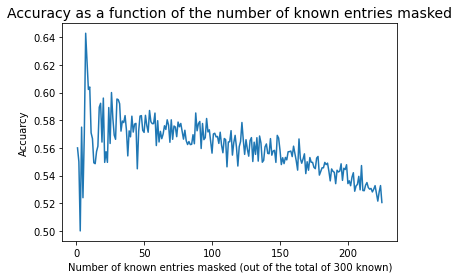

conv_method exp norm KL max_iter 20 alpha 20
Running the iterative method
Accuracy at 60: 0.569 accuracy at 120: 0.5597 accuracy at 180 0.5546
Standard deviation at 60: 0.0584 accuracy at 120: 0.0563 accuracy at 180 0.0411


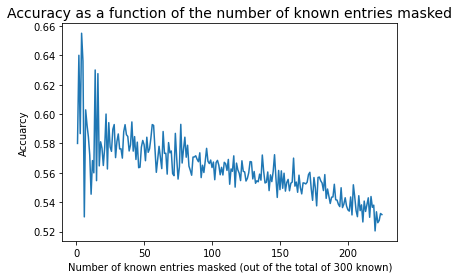

conv_method exp norm Wasserstein max_iter 20 alpha 20
Running the iterative method
Accuracy at 60: 0.5703 accuracy at 120: 0.573 accuracy at 180 0.5488
Standard deviation at 60: 0.0633 accuracy at 120: 0.0444 accuracy at 180 0.0426


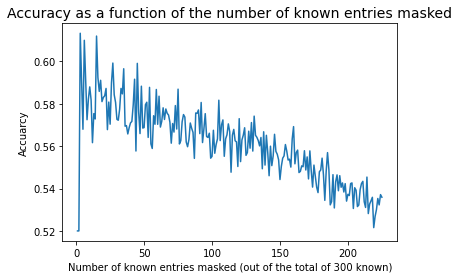

conv_method exp norm None max_iter 20 alpha 30
Running the iterative method
Accuracy at 60: 0.6013 accuracy at 120: 0.5903 accuracy at 180 0.5662
Standard deviation at 60: 0.0648 accuracy at 120: 0.043 accuracy at 180 0.0412


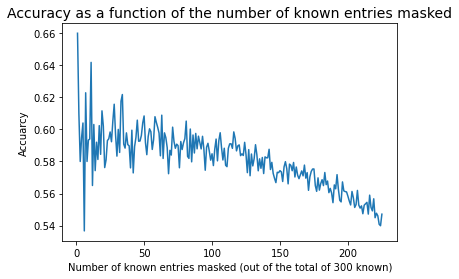

conv_method exp norm KL max_iter 20 alpha 30
Running the iterative method
Accuracy at 60: 0.5853 accuracy at 120: 0.5912 accuracy at 180 0.5706
Standard deviation at 60: 0.0551 accuracy at 120: 0.0425 accuracy at 180 0.0363


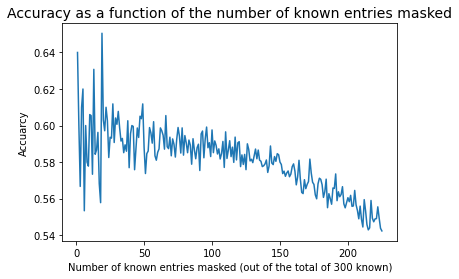

conv_method exp norm Wasserstein max_iter 20 alpha 30
Running the iterative method
Accuracy at 60: 0.5977 accuracy at 120: 0.6003 accuracy at 180 0.57
Standard deviation at 60: 0.0543 accuracy at 120: 0.0396 accuracy at 180 0.0358


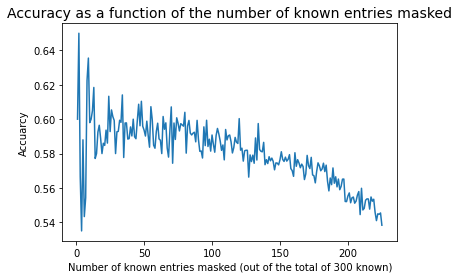

In [30]:
# Get the precision matrix from the recovered sparse graph
theta = get_partial_correlations_from_graph(G)

# creating the node attribute dictionary
unknown_cat = 'not available'

node_attribute_dict = {n:unknown_cat for n in G.nodes()}

# setting the known classes
node_attribute_known = {}
attribute_values = {}
for n in G.nodes:
    # print(paper_cat[paper_cat['paperID']==n])
    attr = paper_cat[paper_cat['paperID']==n].label.iloc[0]
    node_attribute_known[n] = attr
    if attr in attribute_values:
        attribute_values[attr] += 1
    else:
        attribute_values[attr] = 1

node_attribute_dict = set_node_attributes(node_attribute_dict, node_attribute_known)
#for a in attribute_values:
#    print(a, attribute_values[a], round(attribute_values[a]/float(len(G.nodes)), 2))
# print(f'Initial node attributes {node_attribute_dict}\n')
num_classes = len(set(node_attribute_dict.values()))
test_num = 50
method = 'iterative'     # 'analytical'  #'iterative'  #'neighbor_vote' 
norm = "KL"  #None  #'KL', 'Wasserstein']:
a = 40
conv_method = "exp"  # "pos", "exp", "posneg"
iter = 20

known_att, known_pos = tu.number_known(node_attribute_dict, unknown_cat)
print(f'We have {known_att} known attributes out of {len(G.nodes)} nodes')
print(f'Known values belong to the following {len(set(node_attribute_dict.values()))} classes: {set(node_attribute_dict.values())}')
masked_counts = range (1, 3*int(known_att/4)+1)  #3*int(known_att/4)+1)
print(f'We will be testing the following masked settings: {masked_counts}')

results = []
for a in [20, 30]:  #[0.1, 0.3, 0.5, 0.8, 1, 2, 5, 10, 20, 30]:
# for conv_method in ["posneg", "pos", "exp"]:
# for alpha in [35]:
    results_norm = []
    # for a in [30, 40]:
    for norm in [None, "KL", "Wasserstein"]:
    # for a in [1, 10, 15, 20, 25, 30, 35, 40]:
        print("conv_method", conv_method, "norm", norm, "max_iter", iter, "alpha", a)  
        accuracy, std = tu.run_tests(theta, method, node_attribute_dict, masked_counts, unknown_cat, test_num, alpha=a, conv_method=conv_method, norm=norm, max_iter=iter)  
        # accuracy, predDistr = tu.run_tests_confidence(theta, method, node_attribute_dict, masked_counts, unknown_cat, test_num, alpha=a, conv_method="pos", norm=None)
        # print(method, a, norm, conv_method, iter)
        print("Accuracy at 60:", round(accuracy[59], 4), "accuracy at 120:", round(accuracy[119], 4), "accuracy at 180", round(accuracy[179], 4))
        print("Standard deviation at 60:", round(std[59], 4), "standard deviation at 120:", round(std[119], 4), "standard deviation at 180", round(std[179], 4))
        # print(np.array(accuracy).mean(axis=1))
        tu.plot_accuracy_results(accuracy, known_att, masked_counts)   
        # tu.plot_accuracy_by_confidence_results(accuracy, known_att, masked_counts, num_classes)
        results_norm.append(accuracy)
    results.append(results_norm)